In [1]:
 library(Seurat)
library(dplyr)                                                               
library(patchwork)
#library(rhdf5)
library(devtools)
library(hdf5r)
source("/tscc/projects/ps-epigen/bpToolbox/utils.R")

Loading required package: SeuratObject

Loading required package: sp




Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: usethis

Warning message:
“package ‘hdf5r’ was built under R version 4.4.2”


In [2]:
sobj.data <- Read10X_h5("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/Cellranger/JB_1466/raw_feature_bc_matrix.h5")

In [3]:
sobj <- CreateSeuratObject(counts = sobj.data, project = "AT2_organ", min.cells = 3, min.features = 200)

In [4]:
sobj

An object of class Seurat 
23065 features across 17505 samples within 1 assay 
Active assay: RNA (23065 features, 0 variable features)
 1 layer present: counts

In [11]:
unique(colnames(sobj@meta.data))

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "percent.mt"

In [5]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
sobj[["percent.mt"]] <- PercentageFeatureSet(sobj, pattern = "^MT-")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


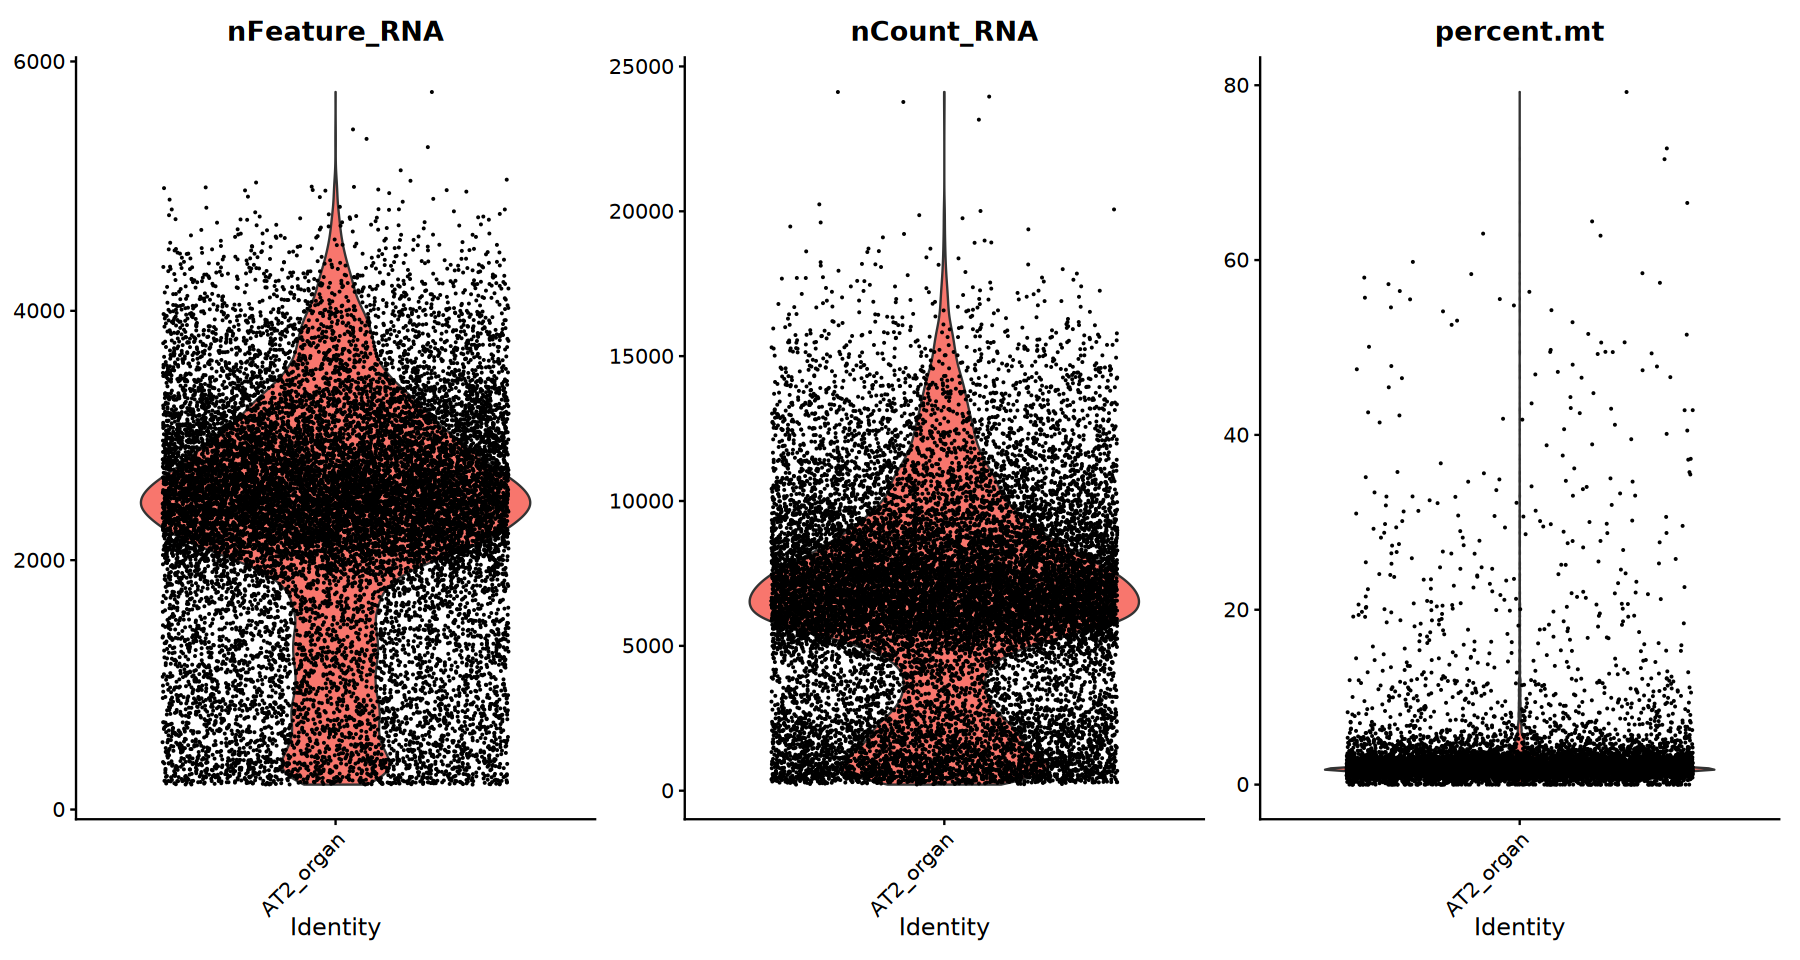

In [6]:
options(repr.plot.width=15, repr.plot.height=8)

# Visualize QC metrics as a violin plot
VlnPlot(sobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [7]:
sobj <- subset(sobj, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


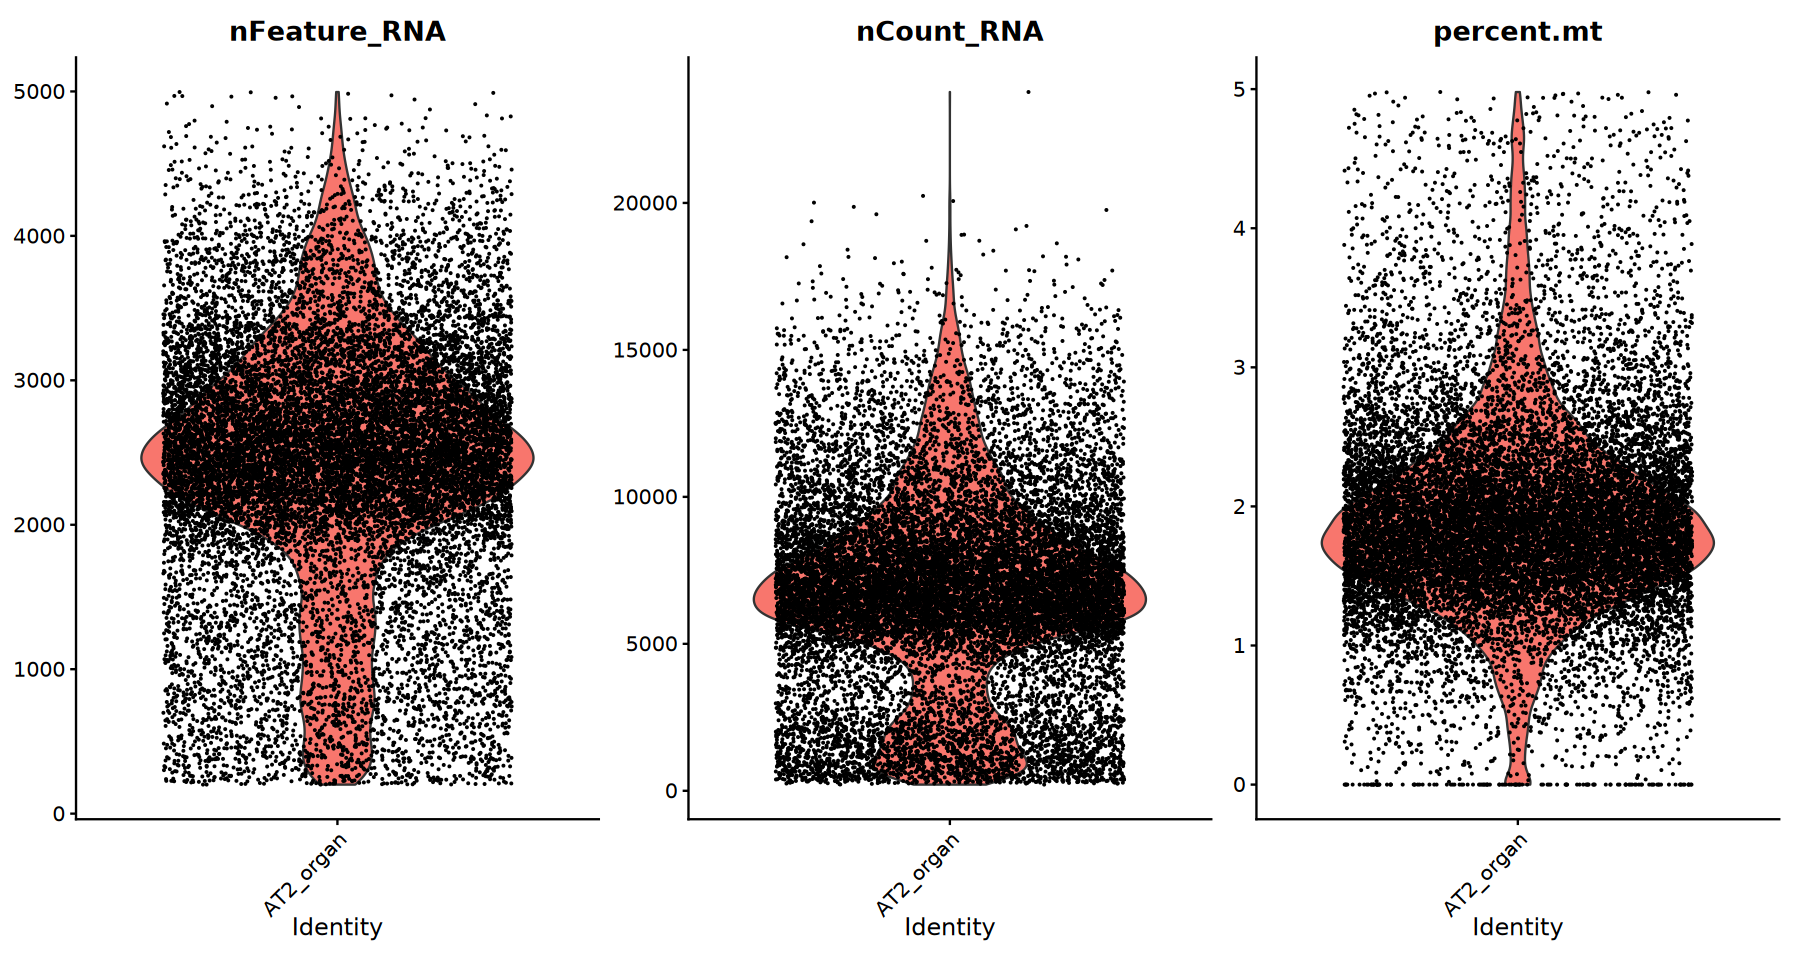

In [8]:
options(repr.plot.width=15, repr.plot.height=8)

# Visualize QC metrics as a violin plot
VlnPlot(sobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [9]:
#sobj<- sct.harm.processing(sobj, dims = 1:50, res = 1.0, n.neigh = 30L, min.dist = 0.3, spread = 1, SCT = TRUE, harmony = FALSE, CM = FALSE)

In [ ]:
# Go to clustering res 1.0 dim 50 
saveRDS(sobj, "/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/rds_objs/250303_initialSeuratObject.RDS")

In [1]:
sobj<- readRDS("tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/SCT/250303_humanAT2_organoids_NA.RDS")

Warning message in gzfile(file, "rb"):
“cannot open compressed file 'tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/SCT/250303_humanAT2_organoids_NA.RDS', probable reason 'No such file or directory'”


ERROR: Error in gzfile(file, "rb"): cannot open the connection
